### Step #1: Understand the Problem Statement

The objective of this case study is to **predict the employee salary based on the number of years of experience**.

In **simple linear regression**, we predict the value of one variable \( Y \) based on another variable \( X \).

- \( X \) is called the **independent variable**.
- \( Y \) is called the **dependent variable**.

**Why simple?** Because it examines the relationship between two variables only.

**Why linear?** When the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


### Step #2: Import Libraries and Datasets

In [252]:
# Importing necessary libraries

# TensorFlow for building and training machine learning models
import tensorflow as tf

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations
import numpy as np

# seaborn for statistical data visualization
import seaborn as sns

# matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt


In [253]:
# Importing the kagglehub library to interact with Kaggle datasets
import kagglehub

# Downloading the latest version of the specified dataset from Kaggle
# The dataset is identified by its unique identifier "rohankayan/years-of-experience-and-salary-dataset"
path = kagglehub.dataset_download("rohankayan/years-of-experience-and-salary-dataset")

# Printing the local path where the dataset files are saved
print("Path to dataset files:", path)


Path to dataset files: C:\Users\men_l\.cache\kagglehub\datasets\rohankayan\years-of-experience-and-salary-dataset\versions\1


In [254]:
# Reading the CSV file 'Salary_Data.csv' into a pandas DataFrame
# This DataFrame will contain the dataset with employee salary and years of experience
salary_df = pd.read_csv('Salary_Data.csv')

# Displaying the first few rows of the DataFrame to verify the data has been loaded correctly
salary_df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Further Steps:

1. **Use `head` and `tail` methods to print the first and last 7 rows of the DataFrame:**

2. **Try to find the maximum salary value in the DataFrame:**

In [255]:
# Display the first 7 rows of the DataFrame
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [256]:
# Display the last 7 rows of the DataFrame
salary_df.tail(7)

,YearsExperience,Salary
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [257]:
# Find the maximum salary value in the DataFrame
max_salary = salary_df['Salary'].max()
print("Maximum Salary:", max_salary)


Maximum Salary: 122391.0


### Step #3: Perform Exploratory Data Analysis and Visualization

<Axes: >

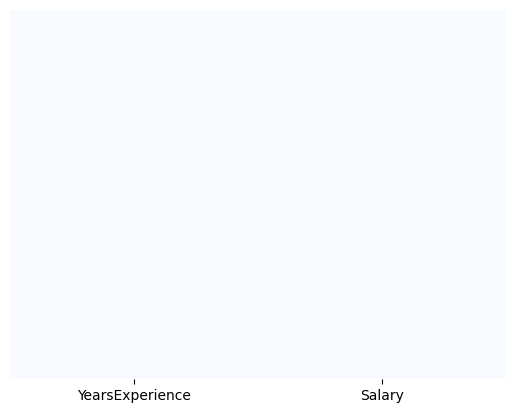

In [258]:
# Check if there are any null values in the DataFrame
# The isnull() method returns a DataFrame of the same shape as salary_df, 
# with True indicating missing values and False indicating non-missing values.
# sns.heatmap() is used to create a heatmap visualization of the null values.
# yticklabels=False removes the y-axis labels for a cleaner look.
# cbar=False removes the color bar to focus on the presence of null values.
# cmap="Blues" sets the color map to shades of blue for better visual distinction.

sns.heatmap(salary_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")


In [259]:
# Check the DataFrame info
# The info() method provides a concise summary of the DataFrame.
# It includes the number of non-null entries, column names, data types, and memory usage.
# This is useful for getting an overview of the dataset and identifying any potential issues, such as missing values or incorrect data types.

salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [260]:
# Generate a statistical summary of the DataFrame
# The describe() method provides descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.
# It includes metrics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
# This summary is useful for understanding the overall distribution and spread of the data.

salary_df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Further Steps:

1. **What are the number of years of experience corresponding to employees with minimum and maximum salaries?**

In [261]:
# Find the number of years of experience for the employee with the minimum salary
min_salary_experience = salary_df.loc[salary_df['Salary'].idxmin(), 'YearsExperience']
print("Years of Experience for Minimum Salary:", min_salary_experience)

# Find the number of years of experience for the employee with the maximum salary
max_salary_experience = salary_df.loc[salary_df['Salary'].idxmax(), 'YearsExperience']
print("Years of Experience for Maximum Salary:", max_salary_experience)


Years of Experience for Minimum Salary: 1.5
Years of Experience for Maximum Salary: 10.3


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

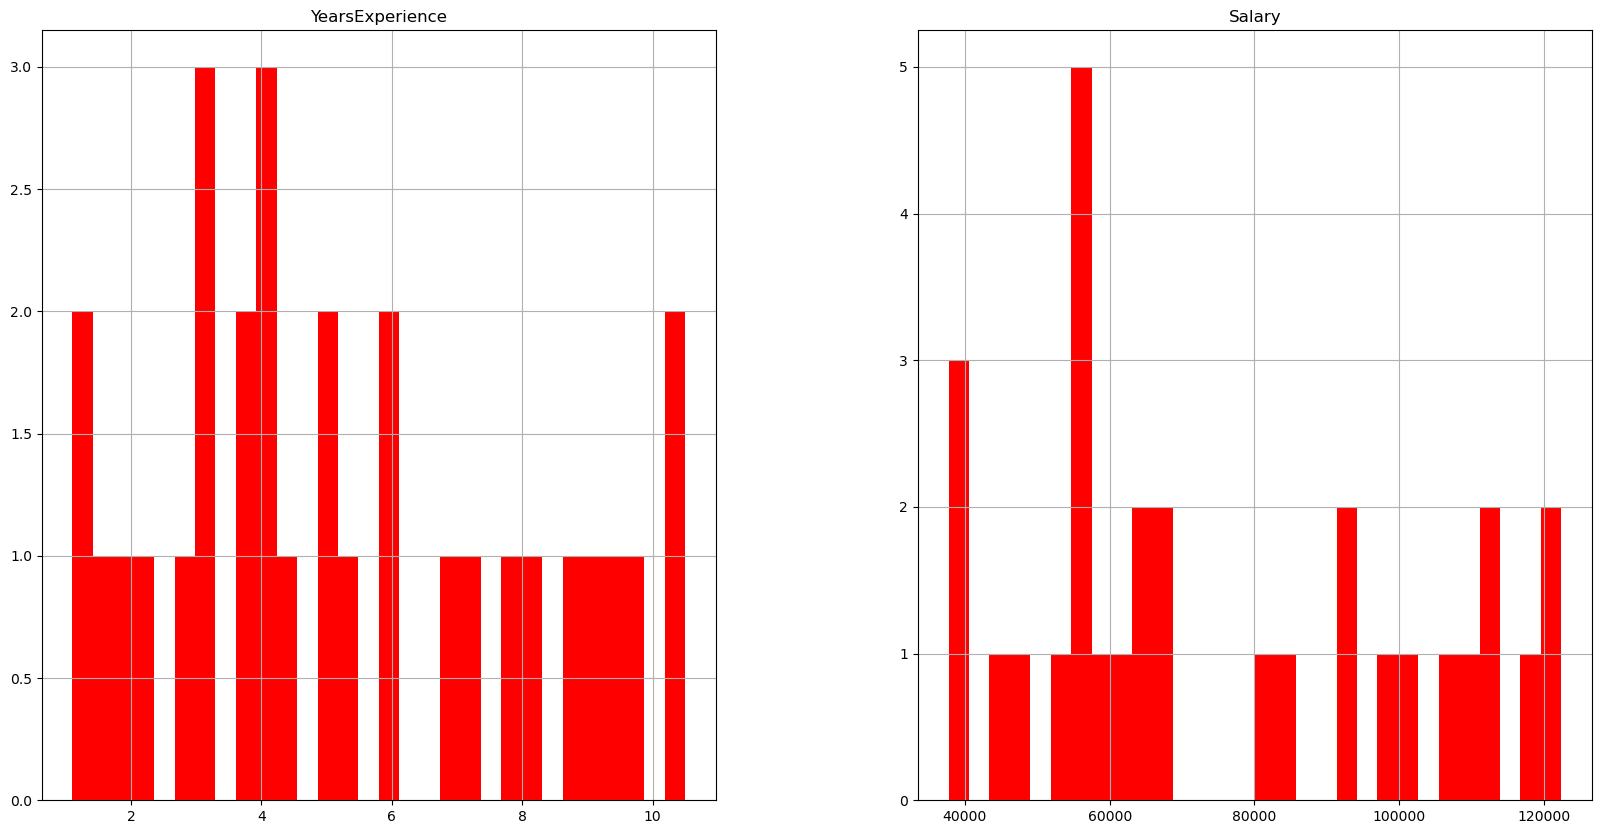

In [262]:
# Create histograms for each numerical column in the DataFrame
# The hist() method generates a histogram for each numerical column in the DataFrame.
# bins=30 specifies the number of bins to use for the histogram, providing a more granular view of the data distribution.
# figsize=(20, 10) sets the size of the figure to 20 inches by 10 inches, making the plot larger and easier to read.
# color='r' sets the color of the histograms to red for better visual distinction.

salary_df.hist(bins=30, figsize=(20, 10), color='r')


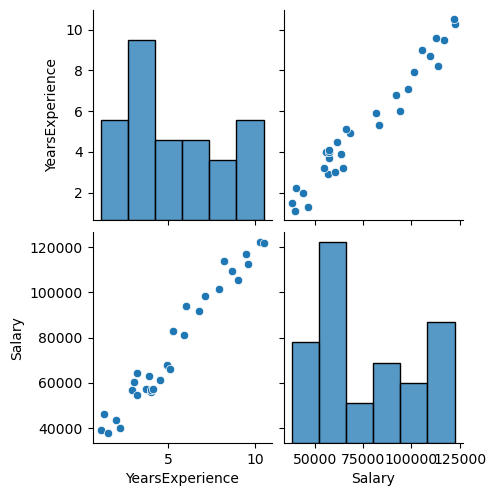

In [263]:
# Plot pairwise relationships in the DataFrame using seaborn's pairplot
# The pairplot() function creates a grid of Axes such that each numeric variable in the DataFrame
# will be shared across the y-axes across a single row and the x-axes across a single column.
# This allows for visualization of the relationships between pairs of variables in the dataset.
# By default, pairplot() will create scatter plots for each pair of variables and histograms for the marginal plots along the diagonal.

sns.pairplot(salary_df)


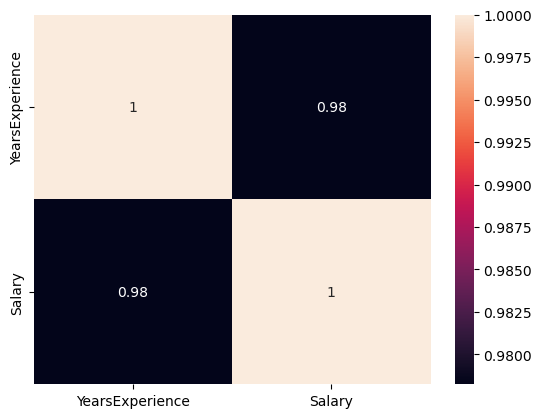

In [264]:
# Calculate the correlation matrix for the DataFrame
# The corr() method computes pairwise correlation of columns, excluding NA/null values.
# The resulting correlation matrix shows the correlation coefficients between each pair of columns in the DataFrame.
corr_matrix = salary_df.corr()

# Create a heatmap to visualize the correlation matrix using seaborn
# sns.heatmap() is used to plot the correlation matrix as a heatmap.
# annot=True adds the correlation coefficient values as annotations on the heatmap cells.
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
# plt.show() is used to display the plot.
plt.show()


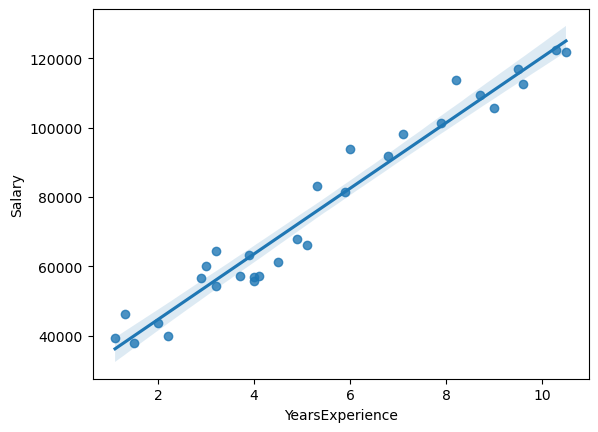

In [265]:
# Plotting a regression line to show the relationship between 'Salary' and 'YearsExperience'
# sns.regplot() creates a scatter plot with a linear regression model fit.
# x='YearsExperience' specifies the independent variable.
# y='Salary' specifies the dependent variable.
# data=salary_df specifies the DataFrame containing the data.
# The function will automatically fit a linear regression model and plot the regression line.

sns.regplot(x='YearsExperience', y='Salary', data=salary_df)

# Display the plot
plt.show()


### Step 4: Create Training and Testing Dataset

In [266]:
# Selecting the feature (independent variable) for the model
# X is a DataFrame containing the 'YearsExperience' column from salary_df.
# This represents the number of years of experience of the employees.
X = salary_df[['YearsExperience']]

# Selecting the target (dependent variable) for the model
# y is a DataFrame containing the 'Salary' column from salary_df.
# This represents the salary of the employees.
y = salary_df[['Salary']]


In [267]:
# Display the first few rows of the feature variable X
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [268]:
# Display the first few rows of the target variable y
y.head()


,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [269]:
# Display the shape of the feature variable X
X.shape


(30, 1)

In [270]:
# Display the shape of the target variable y
y.shape


(30, 1)

In [271]:
import numpy as np

# Convert the input data X to a NumPy array of type float32
X = np.array(X, dtype='float32')

# Convert the target data y to a NumPy array of type float32
y = np.array(y, dtype='float32')


To scale only the numerical variables in dataset `X`, we can use the `StandardScaler` from the `sklearn.preprocessing` module. This will standardize the features by removing the mean and scaling to unit variance.


In [272]:
# Select only the numerical variables from the dataset and apply scaling to them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]], dtype=float32)

In [273]:
from sklearn.preprocessing import StandardScaler

# Select only the numerical variables from the DataFrame
numerical_df = salary_df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical variables
scaled_numerical = scaler.fit_transform(numerical_df)

# Convert the scaled data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_df.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_numerical_df.head())


   YearsExperience    Salary
0        -1.510053 -1.360113
1        -1.438373 -1.105527
2        -1.366693 -1.419919
3        -1.187494 -1.204957
4        -1.115814 -1.339781


In [274]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: Features (input variables)
# y: Target variable (output variable)
# test_size=0.2: 20% of the data will be used for testing, and 80% for training
# The function returns four arrays: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training set features
# X_test: Testing set features
# y_train: Training set target variable
# y_test: Testing set target variable


## Further Steps

1. **Split the Data**:
   - Split the data into 75% for training and 25% for testing.

2. **Verify the Split**:
   - Verify that the split was successful by obtaining the shape of both `X_train` and `X_test`.

3. **Check Data Order**:
   - Did you notice any change in the order of the data? Explain why this might have happened.

In [275]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with 75% for training and 25% for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify the split by checking the shape of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (22, 1)
Shape of X_test: (8, 1)
Shape of y_train: (22, 1)
Shape of y_test: (8, 1)


## Step 5: Train a Linear Regression Model in Scikit-Learn

**Note**: SageMaker built-in algorithms are not used here.


In [276]:
# Import necessary libraries from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
# fit_intercept=True means that the model will calculate the intercept (bias term)
regression_model_sklearn = LinearRegression(fit_intercept=True)

# Fit the model to the training data
# X_train: Training data features
# y_train: Training data target variable
regression_model_sklearn.fit(X_train, y_train)

# Predict the target variable for the test data
# X_test: Test data features
y_pred = regression_model_sklearn.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
# y_test: Actual target values for the test data
# y_pred: Predicted target values for the test data
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 38802592.00


In [277]:
# Calculate the accuracy of the regression model using the test data
# The score method returns the coefficient of determination R^2 of the prediction
# R^2 is a statistical measure that represents the proportion of the variance for a dependent variable
# that's explained by an independent variable or variables in a regression model
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)

# Output the accuracy score
# This will print the R^2 score, which ranges from 0 to 1 for a good model
print(f"Model Accuracy (R^2 score): {regression_model_sklearn_accuracy:.4f}")


Model Accuracy (R^2 score): 0.9347


In [278]:
# Print the coefficient (slope) of the linear regression model
# The coef_ attribute contains the coefficients for the features in the model
# For a simple linear regression, this is the slope (m) of the line
print('Linear Model Coefficient (m): ', regression_model_sklearn.coef_)

# Print the intercept of the linear regression model
# The intercept_ attribute contains the intercept (b) of the model
# This is the point where the regression line crosses the y-axis
print('Linear Model Intercept (b): ', regression_model_sklearn.intercept_)


Linear Model Coefficient (m):  [[9371.018]]
Linear Model Intercept (b):  [25478.117]


In [279]:
from sklearn.linear_model import LinearRegression

# Initialize the regression model with fit_intercept set to False
regression_model_no_intercept = LinearRegression(fit_intercept=False)

# Fit the model with the training data
regression_model_no_intercept.fit(X_train, y_train)

# Print the coefficient(s) of the new model
print('Linear Model Coefficient (m) with fit_intercept=False: ', regression_model_no_intercept.coef_)

# Print the intercept of the new model
# Since fit_intercept=False, the intercept should be zero or very close to zero
print('Linear Model Intercept (b) with fit_intercept=False: ', regression_model_no_intercept.intercept_)


Linear Model Coefficient (m) with fit_intercept=False:  [[13423.455]]
Linear Model Intercept (b) with fit_intercept=False:  0.0


### Step 6: Evaluate Trained Model Performance

**Note:** SageMaker built-in algorithms are not used here.

In [280]:
# Predict the target values using the test data
# The predict method uses the trained regression model to make predictions on the test dataset
# X_test is the input data for which we want to predict the target values
y_predict = regression_model_sklearn.predict(X_test)

# Output the predicted values
# This will print the array of predicted values for the test data
print('Predicted values:', y_predict)


Predicted values: [[115439.89 ]
 [ 71396.11 ]
 [102320.46 ]
 [ 75144.516]
 [ 55465.375]
 [ 60150.883]
 [121999.6  ]
 [107005.97 ]]


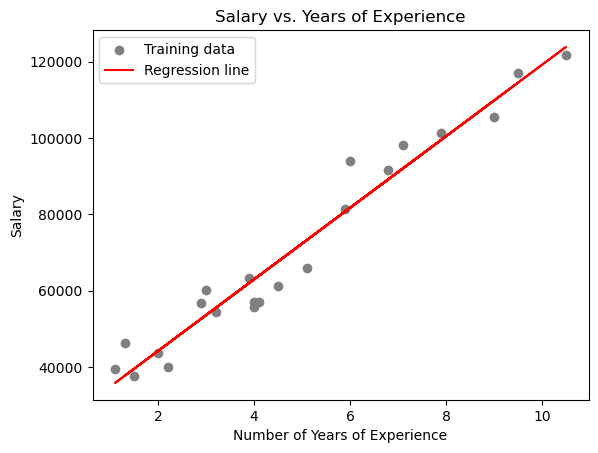

In [281]:
import matplotlib.pyplot as plt

# Scatter plot of the training data
# This will plot the actual data points of the training set
# X_train is the input feature (Years of Experience) and y_train is the target variable (Salary)
plt.scatter(X_train, y_train, color='gray', label='Training data')

# Plot the regression line
# This will plot the predicted values from the regression model on the training data
# The line represents the best fit line according to the linear regression model
plt.plot(X_train, regression_model_sklearn.predict(X_train), color='red', label='Regression line')

# Label the y-axis
# This label indicates that the y-axis represents the Salary
plt.ylabel('Salary')

# Label the x-axis
# This label indicates that the x-axis represents the Number of Years of Experience
plt.xlabel('Number of Years of Experience')

# Add a title to the plot
# The title provides a brief description of what the plot represents
plt.title('Salary vs. Years of Experience')

# Add a legend to the plot
# The legend helps to distinguish between the actual data points and the regression line
plt.legend()

# Display the plot
# This will render the plot in the output
plt.show()


In [282]:
import numpy as np

# Define the number of years of experience for which we want to predict the salary
years_of_experience = 5

# Reshape the input to match the expected shape for the model
# The model expects a 2D array, so we reshape the single value into a 2D array
experience_array = np.array([[years_of_experience]])

# Use the trained regression model to predict the salary
predicted_salary = regression_model_sklearn.predict(experience_array)

# Convert the predicted salary to a float for proper formatting
predicted_salary_value = float(predicted_salary[0])

# Output the predicted salary
# The .2f format specifier ensures the salary is displayed with two decimal places
print(f"Predicted salary for {years_of_experience} years of experience: ${predicted_salary_value:.2f}")


Predicted salary for 5 years of experience: $72333.21


C:\Users\men_l\AppData\Local\Temp\ipykernel_57540\956018194.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_salary_value = float(predicted_salary[0])


### Step 7: Train a Linear Learner Model Using SageMaker


In [283]:
import sagemaker
import boto3
from sagemaker import Session

# Create a SageMaker session
# The SageMaker session is used to manage interactions with Amazon SageMaker
sagemaker_session = sagemaker.Session()

# Define the S3 bucket and prefix to use in this session
# The default_bucket method creates a default S3 bucket to store model artifacts and datasets
bucket = sagemaker_session.default_bucket()

# Prefix is the subfolder within the bucket where data will be stored
prefix = 'linear_learner'

# Instead of getting the execution role, use the configured AWS credentials
# Ensure that the IAM user has the necessary permissions
role = boto3.client('sts').get_caller_identity().get('Arn')

# Print the IAM user ARN to verify
print(role)


arn:aws:iam::471112503258:user/aws-sqs-api-lambda


In [284]:
# Display the shape of the training data
# The shape attribute returns a tuple representing the dimensionality of the DataFrame or array
# For a 2D array or DataFrame, it returns (number of rows, number of columns)
# In the context of machine learning, this typically represents (number of samples, number of features)
train_shape = X_train.shape

# Print the shape of the training data
# This will output the dimensions of the training dataset, helping to understand its structure
print(f"Shape of the training data: {train_shape}")


Shape of the training data: (22, 1)


In [285]:
# Check the shape of y_train to determine if reshaping is necessary
# If y_train is already a 1D array, no reshaping is needed
if len(y_train.shape) == 2 and y_train.shape[1] == 1:
    # Reshape the target variable (y_train) from 2D to 1D
    # The slicing operation [:, 0] selects all rows and the first column of y_train
    y_train = y_train[:, 0]

# Print the shape of the target variable to verify the transformation
# This will output the dimensions of y_train, helping to understand its structure
print(f"Shape of the target variable: {y_train.shape}")

# Print the reshaped target variable to verify the transformation
print(y_train)


Shape of the target variable: (22,)
[ 56957.  39343.  39891.  66029.  56642.  57081.  55794. 101302.  46205.
  37731. 105582.  43525.  98273. 116969.  81363. 121872.  91738.  54445.
  63218.  61111.  93940.  60150.]


In [286]:
# Display the shape of the target variable (y_train)
# The shape attribute returns a tuple representing the dimensionality of the array or DataFrame
# For a 1D array, it returns (number of elements,)
# In the context of machine learning, this typically represents the number of samples
target_shape = y_train.shape

# Print the shape of the target variable
# This will output the dimensions of y_train, helping to understand its structure
print(f"Shape of the target variable: {target_shape}")

Shape of the target variable: (22,)


In [287]:
import io  # The io module allows for dealing with various types of I/O (text I/O, binary I/O, and raw I/O)
import numpy as np
import sagemaker.amazon.common as smac  # SageMaker common library for data conversion

# Convert the data in numpy array format to RecordIO format
# RecordIO is the format required by SageMaker Linear Learner

# Create an in-memory byte array (buf is a buffer we will be writing to)
buf = io.BytesIO()

# Write the numpy arrays (X_train and y_train) to the buffer in RecordIO format
# This function converts the numpy arrays to a dense tensor and writes it to the buffer
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)

# Reset the buffer's current position to the beginning
# When you write to in-memory byte arrays, the position increments with each write
# Resetting it back to zero allows for reading from the beginning of the buffer
buf.seek(0)


0

In [288]:
import os
import boto3  # Import the Boto3 library, which is the AWS SDK for Python

# Define the key for the S3 object
# The key is the name of the file that will be stored in the S3 bucket
key = 'linear-train-data'

# Upload the RecordIO data to the S3 bucket
# The following code uploads the data in RecordIO format to the specified S3 bucket and prefix
# boto3.resource('s3') creates a resource service client for S3
# Bucket(bucket) specifies the S3 bucket to upload to
# Object(os.path.join(prefix, 'train', key)) specifies the S3 object (file) path
# upload_fileobj(buf) uploads the data from the in-memory byte array (buf) to the specified S3 object
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Construct the S3 URI for the uploaded training data
# This URI can be used to reference the training data in S3
s3_train_data = f's3://{bucket}/{prefix}/train/{key}'

# Print the S3 URI of the uploaded training data
# This provides a confirmation of where the training data has been uploaded in S3
print(f'Uploaded training data location: {s3_train_data}')


Uploaded training data location: s3://sagemaker-us-east-1-471112503258/linear_learner/train/linear-train-data


In [289]:
# Display the shape of the test data
# The shape attribute returns a tuple representing the dimensionality of the DataFrame or array
# For a 2D array or DataFrame, it returns (number of rows, number of columns)
# In the context of machine learning, this typically represents (number of samples, number of features)
test_shape = X_test.shape

# Print the shape of the test data
# This will output the dimensions of the test dataset, helping to understand its structure
print(f"Shape of the test data: {test_shape}")


Shape of the test data: (8, 1)


In [290]:
# Get the shape of y_test
# y_test.shape returns a tuple representing the dimensions of y_test
# In this case, it will return (2,) because y_test contains 2 elements
shape_of_y_test = y_test.shape

# Print the shape of y_test
print(f"The shape of y_test is: {shape_of_y_test}")

The shape of y_test is: (8, 1)


In [291]:
# Ensure that the target label y_test is a one-dimensional vector
# Check if y_test is a 2D array with a single column
if len(y_test.shape) == 2 and y_test.shape[1] == 1:
    # y_test[:, 0] selects all rows and the first column of y_test
    y_test = y_test[:, 0]
elif len(y_test.shape) > 2:
    raise ValueError("y_test has more than 2 dimensions, which is not supported.")
# If y_test is already 1D, no changes are needed

# Get the shape of y_test
# y_test.shape returns a tuple representing the dimensions of y_test
shape_of_y_test = y_test.shape

# Print the shape of y_test
print(f"The shape of y_test is: {shape_of_y_test}")


The shape of y_test is: (8,)


In [292]:
# Create an in-memory byte array (buf is a buffer we will be writing to)
buf = io.BytesIO()

# Write the numpy arrays X_test and y_test to the buffer in RecordIO format
# This function converts the numpy arrays into a dense tensor and writes it to the buffer
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)

# Reset the buffer's current position to the beginning
# When you write to in-memory byte arrays, the position increments with each write
# We reset it back to zero to ensure the entire content can be read from the beginning
buf.seek(0)


0

In [293]:
import os
import boto3

# Key refers to the name of the file to be uploaded to S3
key = 'linear-test-data'

# Create an S3 resource using boto3
# This allows us to interact with the S3 service
s3_resource = boto3.resource('s3')

# Define the S3 bucket name and the object key (file path in the bucket)
# bucket_name is the name of your S3 bucket
# object_key is the path within the bucket where the file will be stored
bucket_name = 'aws-sqs-api-lambda'
object_key = os.path.join(prefix, 'test', key)

# Ensure the buffer is open before uploading
# buf is the in-memory byte array containing the data to be uploaded
# The upload_fileobj method uploads the contents of the buffer to the specified S3 bucket and object key
with io.BytesIO() as buf:
    # Write the numpy arrays X_test and y_test to the buffer in RecordIO format
    smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
    
    # Reset the buffer's current position to the beginning
    buf.seek(0)
    
    # Upload the buffer content to S3
    s3_resource.Bucket(bucket_name).Object(object_key).upload_fileobj(buf)

# Construct the S3 URI for the uploaded data
# This URI can be used to access the data later for training
s3_test_data = f's3://{bucket_name}/{prefix}/test/{key}'

# Print out the location of the uploaded testing data in S3
print(f'Uploaded testing data location: {s3_test_data}')


Uploaded testing data location: s3://aws-sqs-api-lambda/linear_learner/test/linear-test-data


In [294]:
# Create an output placeholder in the S3 bucket to store the linear learner output
# The output_location variable constructs the S3 URI where the training artifacts will be uploaded
output_location = f's3://{bucket}/{prefix}/output'

# Print out the location of the training artifacts in S3
# This provides a confirmation of where the training artifacts will be stored
print(f'Training artifacts will be uploaded to: {output_location}')

Training artifacts will be uploaded to: s3://sagemaker-us-east-1-471112503258/linear_learner/output


In [295]:
# Import necessary libraries
# boto3 is used to interact with AWS services
# sagemaker.amazon.amazon_estimator provides utilities for Amazon SageMaker built-in algorithms
import boto3
from sagemaker.amazon.amazon_estimator import get_image_uri

# Obtain the current AWS region name using boto3.Session
# This ensures that the code dynamically adapts to the region where it is executed
region = boto3.Session().region_name

# Specify the name of the SageMaker built-in algorithm
# In this case, we are using the 'linear-learner' algorithm
algorithm_name = 'linear-learner'

# Obtain the container image URI for the specified algorithm
# get_image_uri dynamically retrieves the appropriate container image for the given algorithm and region
container = get_image_uri(region, algorithm_name)

# Print the container image URI
# This provides a confirmation of the container image URI that will be used for training
print(f'Container image URI for {algorithm_name}: {container}')


See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Same images used for training and inference. Defaulting to image scope: inference.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


Container image URI for linear-learner: 382416733822.dkr.ecr.us-east-1.amazonaws.com/linear-learner:1


In [298]:
linear = sagemaker.estimator.Estimator(container,
                   role,
                   instance_count=1,
                   instance_type='ml.m5.xlarge',
                   output_path=output_location,
                   sagemaker_session=sagemaker_session,
                   use_spot_instances=True,
                   max_run=300,
                   max_wait=600)

# # Set hyperparameters for the linear learner algorithm
linear.set_hyperparameters(feature_dim=1,
                           predictor_type='regressor',
                           mini_batch_size=5,
                           epochs=5,
                           num_models=32,
                           loss='absolute_loss')
print(linear)
# # Define the S3 URI for the training data
# s3_train_data = 's3://aws-sqs-api-lambda/data/2024/train'

## Start the training job by passing the training data location to the fit method
linear.fit({'train': s3_train_data})




s3://sagemaker-us-east-1-471112503258/linear_learner/train/linear-train-data


KeyboardInterrupt: 

## Step 8: Deploy and Test the Trained Linear Learner Model

In [ ]:
# Deploying the model to perform inference

# Deploy the trained Linear Learner model to an endpoint
# This step creates an endpoint where the model can be accessed for making predictions.
# Note: AWS charges for the time the endpoint is running, so be sure to delete it when not in use.
linear_regressor = linear.deploy(
    initial_instance_count=1,  # Number of instances to deploy
    instance_type='ml.m5.xlarge'  # Type of instance to use for deployment
)

# Endpoint: The endpoint is the URL where the deployed model is hosted.
# This is the point where AWS starts charging for the deployed model.
# You can use this endpoint to send data and receive predictions.


In [ ]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

# The CSVSerializer and JSONDeserializer classes are used to handle the input and output data formats for the deployed model.

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.
# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type.
# Deserializer accepts two arguments, the result data and the response content type, and returns the deserialized data.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# Set the serializer for the linear_regressor to CSVSerializer.
# This means that the input data will be serialized to 'text/csv' format before being sent to the model.
linear_regressor.serializer = CSVSerializer()

# Set the deserializer for the linear_regressor to JSONDeserializer.
# This means that the output data from the model will be deserialized from JSON format.
linear_regressor.deserializer = JSONDeserializer()


In [ ]:
# Making predictions on the test data

# Use the deployed model to make predictions on the test data.
# The predict method sends the test data to the deployed endpoint and returns the model's predictions.

# X_test: This is the test dataset that you want to make predictions on.
# Ensure that X_test is in the same format as the training data used to train the model.

result = linear_regressor.predict(X_test)

# The result variable will contain the predictions made by the model.
# These predictions can be compared with the actual values to evaluate the model's performance.


In [ ]:
# Example of parsing the JSON result
import json

# Assuming result is a JSON string
parsed_result = json.loads(result)
print(parsed_result)

In [ ]:
# Since the result is in JSON format, we access the scores by iterating through the scores in the predictions

# The result from the predict method is in JSON format.
# We need to extract the prediction scores from this JSON response.

# Assuming result is a dictionary with a key 'predictions' that contains a list of prediction results.
# Each prediction result is a dictionary with a key 'score' that holds the prediction value.

# Use a list comprehension to iterate through the list of predictions and extract the scores.
predictions = np.array([r['score'] for r in result['predictions']])

# The predictions variable will now be a NumPy array containing the prediction scores.
print(predictions)


In [ ]:
# Check the shape of the predictions array
print(predictions.shape)


In [ ]:
# VISUALIZE TEST SET RESULTS

# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Create a scatter plot of the test data
# X_test: Test data for the independent variable (e.g., Years of Experience)
# y_test: Actual values for the dependent variable (e.g., Salary)
# color='gray': Color of the scatter plot points
plt.scatter(X_test, y_test, color='gray')

# Plot the regression line based on the predictions
# X_test: Test data for the independent variable (e.g., Years of Experience)
# predictions: Predicted values for the dependent variable (e.g., Salary)
# color='red': Color of the regression line
plt.plot(X_test, predictions, color='red')

# Set the label for the x-axis
# 'Years of Experience (Testing Dataset)': Label for the x-axis
plt.xlabel('Years of Experience (Testing Dataset)')

# Set the label for the y-axis
# 'Salary': Label for the y-axis
plt.ylabel('Salary')

# Set the title of the plot
# 'Salary vs. Years of Experience': Title of the plot
plt.title('Salary vs. Years of Experience')

# Display the plot
plt.show()


In [ ]:
# Delete the endpoint

# It's important to delete the endpoint when it's no longer needed to avoid incurring charges.
# The delete_endpoint method removes the deployed model endpoint.

linear_regressor.delete_endpoint()

# Always delete endpoints when they are no longer in use to avoid unnecessary charges.
# AWS charges for the time the endpoint is running, so deleting it helps manage costs.

# Additionally, remember to delete any S3 buckets used for storing data before 30 days of deployment.
# S3 buckets can also incur storage costs, so it's good practice to clean up resources that are no longer needed.
